Note: Picked k = 1 because it had the best balance between recall, precision, F1, and accuracy. Refer to results in find_optimal_plain_k.py.

Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Load Dataset

In [2]:
from pathlib import Path

# get absolute path
project_root = Path.cwd().parent 
csv_path = project_root / "data" / "output" / "tfidf_dataset.csv"

# load dataset
df = pd.read_csv(csv_path)

# split features and label
X = df.drop(columns=['cyberbullying'])  # TF-IDF features
y = df['cyberbullying']                 # 0 = not cyberbullying, 1 = cyberbullying

Train Plain KNN (k=1) with 5-fold CV

In [3]:
# set up 5-fold cross validation
# using 5-folds across all the models to standardize evaluation 
folds = 5
kf = KFold(n_splits=folds, shuffle=True, random_state=42)

# evaluate plain KNN with k = 1
k_value = 1
knn = KNeighborsClassifier(n_neighbors=k_value)

# track predictions and true labels
all_preds = []
all_trues = []

# 5-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    all_preds.extend(y_pred)
    all_trues.extend(y_test)

Results/Evaluation

Overall Accuracy: 0.6445

Overall F1-Weighted Score: 0.6357
              precision    recall  f1-score   support

           0     0.6103    0.7996    0.6922     16225
           1     0.7094    0.4894    0.5792     16225

    accuracy                         0.6445     32450
   macro avg     0.6598    0.6445    0.6357     32450
weighted avg     0.6598    0.6445    0.6357     32450

Confusion Matrix:


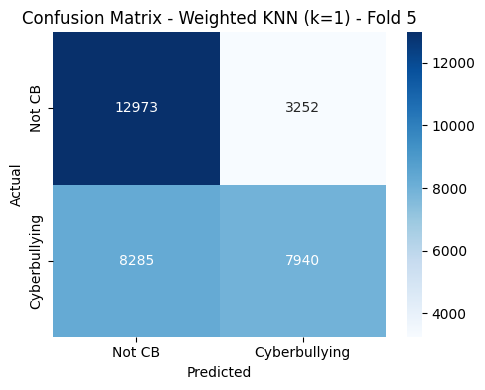

In [4]:
# final evaluation over all folds combined
print(f"Overall Accuracy: {accuracy_score(all_trues, all_preds):.4f}")
overall_f1 = f1_score(all_trues, all_preds, average='weighted')
print(f"\nOverall F1-Weighted Score: {overall_f1:.4f}")
print(classification_report(all_trues, all_preds, digits=4))

print("Confusion Matrix:")
cm = confusion_matrix(all_trues, all_preds)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not CB", "Cyberbullying"], yticklabels=["Not CB", "Cyberbullying"])
plt.title(f"Confusion Matrix - Weighted KNN (k={k_value}) - Fold {folds}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()